In [19]:
import numpy as np
from scipy import stats
import seaborn as sns
sns.set_context('paper', font_scale=0.73)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize

In [2]:
stats.gamma

In [3]:
def sample(mean=90, stddev=18, size=1):
    err_mean = 100 - mean
    a = (err_mean * err_mean) / (stddev * stddev)
    scale = (stddev * stddev) / err_mean
    return 100 - (stats.gamma.rvs(a, size=size, scale=scale).astype(int) + 1)

69.302
19.686919413661446


/home/johnny/.conda/envs/wmt22/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

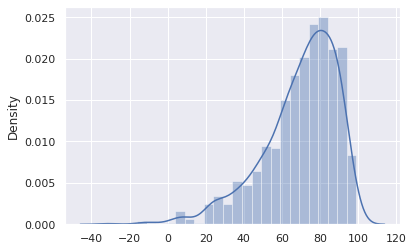

In [4]:
r = sample(mean=70, stddev=20, size=1000)
print(np.mean(r))
print(np.std(r))
sns.distplot(r)

In [5]:
baseline_mean = 79.39
max_difference = 5
stddev = 15.50

In [6]:
def simulate_power(size, stddev, baseline_mean, other_mean, trials, p=0.05):
    pvalues = []
    for i in range(0, trials):
        baseline_sys = sample(size=size, mean=baseline_mean, stddev=stddev)
        other_sys = sample(mean=other_mean, stddev=stddev, size=size)

        ind, pvalue = stats.mannwhitneyu(baseline_sys, other_sys)
        pvalues.append(pvalue)
    power = (np.array(pvalues) < p).sum() / trials
    return power

def search_power(high, low, baseline_mean, other_mean, stddev, 
                 trials=1000, desired_power=0.95, p=0.05, tolerance=0.005):
    if simulate_power(high, stddev, baseline_mean, other_mean, trials) < desired_power:
        print('Range is too small.')

    if simulate_power(low+1, stddev, baseline_mean, other_mean, trials) > desired_power:
        print('Range is too small.')

    # try a range
    while low <= high:
        size = (high + low) // 2

        power = simulate_power(size, stddev, baseline_mean, other_mean, trials, p=p)
        print('Size: %d, power: %.3f, difference: %.2f' % (size, power, baseline_mean - other_mean))

        if np.abs(power - 0.95) < tolerance:
            break
        
        # If x is greater, ignore left half
        if desired_power > power:
            low = size + 1

        # If x is smaller, ignore right half
        elif desired_power < power:
            high = size - 1

    return size

In [7]:
trials = 1000
desired_power = 0.95

In [15]:

# high, low, baseline_mean, stddev
exp_params = [
    (20000, 0, 90.294452, 18.246645),
    (20000, 0, 91.991749, 14.313352),
    (20000, 0, 92.475884, 13.612182),
    (20000, 0, 91.650683, 14.927010),
]

xs = np.arange(0., 4.5, 0.5)[1:]
xs

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

In [16]:
# experimental params
experiments = []
for high, low, baseline_mean, stddev in exp_params:
    sizes = []
    for diff in xs:
        size = search_power(high, low, baseline_mean, baseline_mean - diff, stddev, trials=trials, desired_power=desired_power)
        sizes.append(size*2)
    experiments.append(sizes)
    print(sizes)
print(experiments)

Size: 10000, power: 0.990, difference: 0.50
Size: 4999, power: 0.897, difference: 0.50
Size: 7499, power: 0.978, difference: 0.50
Size: 6249, power: 0.951, difference: 0.50
Size: 10000, power: 1.000, difference: 1.00
Size: 4999, power: 1.000, difference: 1.00
Size: 2499, power: 0.996, difference: 1.00
Size: 1249, power: 0.881, difference: 1.00
Size: 1874, power: 0.966, difference: 1.00
Size: 1561, power: 0.934, difference: 1.00
Size: 1717, power: 0.950, difference: 1.00
Size: 10000, power: 1.000, difference: 1.50
Size: 4999, power: 1.000, difference: 1.50
Size: 2499, power: 1.000, difference: 1.50
Size: 1249, power: 0.996, difference: 1.50
Size: 624, power: 0.906, difference: 1.50
Size: 936, power: 0.970, difference: 1.50
Size: 780, power: 0.954, difference: 1.50
Size: 10000, power: 1.000, difference: 2.00
Size: 4999, power: 1.000, difference: 2.00
Size: 2499, power: 1.000, difference: 2.00
Size: 1249, power: 1.000, difference: 2.00
Size: 624, power: 0.993, difference: 2.00
Size: 311, 

Size: 2499, power: 1.000, difference: 1.00
Size: 1249, power: 0.976, difference: 1.00
Size: 624, power: 0.803, difference: 1.00
Size: 936, power: 0.925, difference: 1.00
Size: 1092, power: 0.948, difference: 1.00
Size: 10000, power: 1.000, difference: 1.50
Size: 4999, power: 1.000, difference: 1.50
Size: 2499, power: 1.000, difference: 1.50
Size: 1249, power: 1.000, difference: 1.50
Size: 624, power: 0.983, difference: 1.50
Size: 311, power: 0.830, difference: 1.50
Size: 467, power: 0.942, difference: 1.50
Size: 545, power: 0.973, difference: 1.50
Size: 506, power: 0.959, difference: 1.50
Size: 486, power: 0.950, difference: 1.50
Size: 10000, power: 1.000, difference: 2.00
Size: 4999, power: 1.000, difference: 2.00
Size: 2499, power: 1.000, difference: 2.00
Size: 1249, power: 1.000, difference: 2.00
Size: 624, power: 1.000, difference: 2.00
Size: 311, power: 0.973, difference: 2.00
Size: 155, power: 0.773, difference: 2.00
Size: 233, power: 0.913, difference: 2.00
Size: 272, power: 0.9

In [24]:
np.array(experiments)

array([[12498,  3434,  1560,   856,   562,   404,   306,   250],
       [ 8904,  2240,  1090,   582,   384,   286,   226,   170],
       [ 7494,  2184,   972,   544,   348,   270,   192,   162],
       [ 9372,  2516,  1090,   652,   424,   310,   240,   186]])

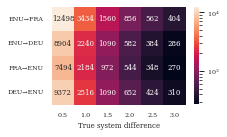

In [27]:
plt.figure(figsize=(3, 1.8))
sns.heatmap(np.array(experiments)[:,:-2], annot=True, fmt='d', xticklabels=xs[:-2], yticklabels=['ENU→FRA', 'ENU→DEU', 'FRA→ENU', 'DEU→ENU'], norm=LogNorm())
plt.xlabel('True system difference')
plt.savefig('power_analysis.pdf', bbox_inches='tight')